# Homework 3 - SVM and Regularization
## CSCI 5622 - Spring 2019
***
**Name**: $<$Justus Tulowiecki$>$ 
***

This assignment is due on Canvas by **11.59 PM on Monday, March 16**. Submit only this Jupyter notebook to Canvas.  Do not compress it using tar, rar, zip, etc. Your solutions to analysis questions should be done in Markdown directly below the associated question.  Remember that you are encouraged to discuss the problems with your classmates and instructors, but **you must write all code and solutions on your own**, and list any people or sources consulted.

Portions of this assignment, including the plotting functions used, are implemented from Andrew Ng's Machine Learning course.

## Part 1: Lasso and Ridge regression - 40 points

We have seen that the difference between LASSO and Ridge regression is due to their different regularization model (L1 norm vs. L2 norm). The regularization term in LASSO is $\lambda||\mathbf w||_1$, while the regularization term in ridge regression is  $(\lambda/2) ||\mathbf w||^2$ (where $\mathbf w$ denotes the set of parameters for the linear regression model and $\lambda$ is the trade-off regularization parameter). LASSO typically enforces more _sparsity_ on the resulting $\mathbf w$. That is, the resulting classifier will have a small number of non-zero weights. In this exercise, you'll explore differences in performance between LASSO and Ridge regression algorithms across a few different data sets.

You will be using the following data sets:

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
class DataA:
    def __init__(self):
        f = lambda x, y : np.random.randn(x, y)
        self.train_x = f(1000, 20)
        self.train_y = f(1000, 1)[:,0]
        self.test_x = f(500, 20)
        self.test_y = f(500, 1)[:,0]
        
class DataB:
    def __init__(self):
        # Data from: https://archive.ics.uci.edu/ml/datasets/Cloud
        data = np.fromfile("data/cloud.data", sep = " ").reshape((1024, 10))
        y = data[:, 6]
        X = np.delete(data, 6, axis = 1)
        
        self.train_x = X[:800]
        self.train_y = y[:800]
        
        self.test_x = X[800:]
        self.test_y = y[800:]
        
class DataC:
    def __init__(self):
        # Data from: http://archive.ics.uci.edu/ml/datasets/Forest+Fires
        data = pd.read_csv("data/forestfires.csv")
        data = data.sample(frac = 1).reset_index(drop = True).drop(columns = ["month", "day"])
        data["area"] = np.log(data["area"] + 1)
        X = data.drop(columns = "area").values
        y = data["area"].values
        
        self.train_x = X[:400]
        self.train_y = y[:400]
        
        self.test_x = X[400:]
        self.test_y = y[400:]

In [2]:
data_a = DataA()
data_b = DataB()
data_c = DataC()

1. [15 Pts] Fit a regressor to the data set using sklearn's `Lasso` module (for more details, read [here](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html)):
    1. Train a LASSO model for each of the 3 data sets(A, B and C) using 5 different values for the regularization parameter $\lambda$. Use $\lambda = 0.01, 0.05, 0.1, 0.2, 0.3$. Report and plot the number of non-zero coefficients.
    2. Report the value of $\lambda$ that yields the minimum number of non-zero coefficients in the resulting $\mathbf w$ in case of each dataset, and report the number of non-zero coefficients in that case. Keep track of this $\mathbf w$, we will refer to it as $\mathbf w_b$. [This step is only needed if any $\mathbf{w}$ has coefficients that are 0.]
    3. For each of the classifiers learned in part (A), compute their test error as mean-squared-error. Plot the test error as function of $\lambda$ for all three datasets in the same graph.
    4. Report the value of $\lambda$ that yields the $\mathbf w$ with the minimum test error in case of each dataset. Save this $\mathbf w$ as $\mathbf w_d$. How many non-zero coordinates does $\mathbf w_d$ have? Keep track of this, as well as the answers for $\mathbf w_b$ for the comparison to Ridge Regression below. It might be helpful to make a table, i.e. the number of non-zero coordinates and the test error for $\mathbf w_b$ and $\mathbf w_d$ for each data set.
    5. For data set A, by increasing the value of $\lambda$, can you get most of the entries to be 0? Can you get every entry to be 0?
    
Note: $\lambda$ is same as $\alpha$ in the sklearn module.

------------------- PART (A)---------------------------
Num of nonzero coeff. in dataset A for gamma value of 0.01 : 17
Num of nonzero coeff. in dataset A for gamma value of 0.05 : 1
Num of nonzero coeff. in dataset A for gamma value of 0.1 : 0
Num of nonzero coeff. in dataset A for gamma value of 0.2 : 0
Num of nonzero coeff. in dataset A for gamma value of 0.3 : 0
Num of nonzero coeff. in dataset B for gamma value of 0.01 : 9
Num of nonzero coeff. in dataset B for gamma value of 0.05 : 7
Num of nonzero coeff. in dataset B for gamma value of 0.1 : 7
Num of nonzero coeff. in dataset B for gamma value of 0.2 : 7
Num of nonzero coeff. in dataset B for gamma value of 0.3 : 6
Num of nonzero coeff. in dataset C for gamma value of 0.01 : 9
Num of nonzero coeff. in dataset C for gamma value of 0.05 : 7
Num of nonzero coeff. in dataset C for gamma value of 0.1 : 6
Num of nonzero coeff. in dataset C for gamma value of 0.2 : 4
Num of nonzero coeff. in dataset C for gamma value of 0.3 : 3


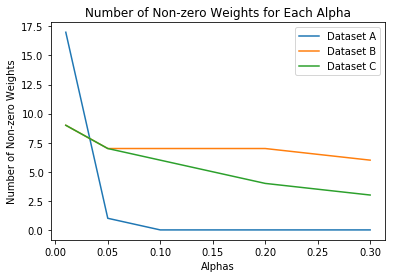

------------------- PART (B)---------------------------
Lambdas that yield the minimum number of non-zero coefficients
   Dataset  Alpha
2        A    0.1
3        A    0.2
4        A    0.3
9        B    0.3
14       C    0.3
------------------- PART (C)---------------------------


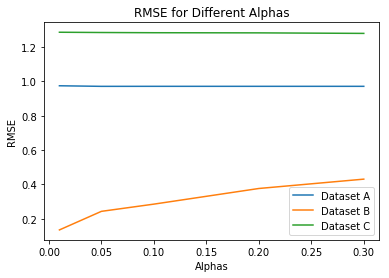

   Dataset  Alpha     Error
0        A   0.01  0.974488
1        A   0.05  0.971113
2        A   0.10  0.971253
3        A   0.20  0.971253
4        A   0.30  0.971253
5        B   0.01  0.135084
6        B   0.05  0.243201
7        B   0.10  0.285262
8        B   0.20  0.376322
9        B   0.30  0.430763
10       C   0.01  1.286179
11       C   0.05  1.284635
12       C   0.10  1.283403
13       C   0.20  1.282576
14       C   0.30  1.279476
------------------- PART (D)---------------------------
Alpha values that produce the minimum test error:

   Dataset  Alpha     Error  # Nonzero Weights
1        A   0.05  0.971113                  1
5        B   0.01  0.135084                  9
14       C   0.30  1.279476                  3
------------------- PART (E)---------------------------
As seen in part A, as the value of lambda increases for dataset A, most(or even all) of the entires can be forced to 0


In [3]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from matplotlib.pylab import plt
import math

class Lasso:
    def __init__(self, gamma, data):
        self.gamma = gamma
        self.data = data
        
        self.w = np.array([])
        
    def fit(self):
        '''
        Here you must fit a Lasso model, train it using the data you have in self.data, 
        specifically the training part, for the specified value of gamma in self.gamma. 
        Calculate the number of non-zero coefficients in the model weights. Then,
        test the trained model on the testing part of the data in self.data and calculate the
        Root mean square error between the predicted values and the actual values of target variable.
        
        RETURN : 
            num_nonzero_coeff : number of non-zero coefficients in the model weights
            mean_squared_err : Root mean square error between the predicted values and the 
            actual values of target variable
        '''
        
        lasso = linear_model.Lasso(self.gamma)
        lasso.fit(self.data.train_x, self.data.train_y)
        num_nonzero_coef = np.where(lasso.coef_ != 0 ,1,0).sum()
        self.w = lasso.coef_
        pred = lasso.predict(self.data.test_x)
        mean_squared_err = np.sqrt(mean_squared_error(pred, self.data.test_y))
        return(num_nonzero_coef, mean_squared_err, pred)



data_sets = {'A': data_a, 'B': data_b, 'C': data_c}
alphas = [0.01, 0.05, 0.1, 0.2, 0.3]




print('------------------- PART (A)---------------------------')

nonzero_list = []
templist = []

for key, dset in data_sets.items():
    for a in alphas:
        lasso = Lasso(a, dset) #instantiate a Lasso model for given alpha(a) and dataset(dset)
        model = lasso.fit()
        nonzero_list.append(model[0])                            #append number of non zero weights to a list
        print("Num of nonzero coeff. in dataset",key, "for gamma value of", a,":", model[0])
        
        templist.append(((key, a, model[0], lasso.w, model[1], model[2]))) #temporary list that will be converted to dataframe later

        
nonzero_arr = np.asarray(nonzero_list)
nonzero_arr = np.transpose(nonzero_arr.reshape(3,5))
df = pd.DataFrame(data = templist, columns=['Dataset', 'Alpha', '# Nonzero Weights', 'Weights', 'Error', 'Pred'])

plt.plot(alphas, nonzero_arr)
plt.title("Number of Non-zero Weights for Each Alpha")
plt.xlabel("Alphas")
plt.ylabel("Number of Non-zero Weights")
plt.legend(['Dataset A','Dataset B','Dataset C'])
plt.show()



print('------------------- PART (B)---------------------------')
#Report the value of  𝜆  that yields the minimum number of non-zero coefficients in the resulting  
#𝐰  in case of each dataset, and report the number of non-zero coefficients in that case. Keep track of this  
#𝐰 , we will refer to it as  𝐰𝑏 . [This step is only needed if any  𝐰  has coefficients that are 0.]

#Subset the dataframes for each dataset
Adf = df[df.iloc[:,0] == 'A']
Bdf = df[df.iloc[:,0] == 'B']
Cdf = df[df.iloc[:,0] == 'C']

Awb_mask = (Adf.iloc[:,2] == Adf.iloc[:,2].min()) #creates mask for lambda that yields the minimum # of non-zero coeff
Bwb_mask = Bdf.iloc[:,2] == Bdf.iloc[:,2].min()
Cwb_mask = Cdf.iloc[:,2] == Cdf.iloc[:,2].min()

cols = ['Dataset','Alpha','Error', '# Nonzero Weights']

Awb = Adf[Awb_mask][cols]
Bwb = Bdf[Bwb_mask][cols]
Cwb = Cdf[Cwb_mask][cols]

wb_lasso = Awb.append(Bwb).append(Cwb)

#Print the rows for each dataset where there is a minimum of non-zero coefficients
print("Lambdas that yield the minimum number of non-zero coefficients")
print(Adf[Awb_mask].iloc[:,:2].append(Bdf[Bwb_mask].iloc[:,:2]).append(Cdf[Cwb_mask].iloc[:,:2]) )

print('------------------- PART (C)---------------------------')
#For each of the classifiers learned in part (A), compute their test error as mean-squared-error. Plot the test error as function of  𝜆  for all three datasets in the same grap

plt.plot('Alpha', 'Error', data=Adf)
plt.plot('Alpha', 'Error', data=Bdf)
plt.plot('Alpha', 'Error', data=Cdf)
plt.title("RMSE for Different Alphas")
plt.xlabel("Alphas")
plt.ylabel("RMSE")
plt.legend(['Dataset A','Dataset B','Dataset C'])
plt.show()

print(df[['Dataset', 'Alpha', 'Error']])


print('------------------- PART (D)---------------------------')
#Report the value of  𝜆  that yields the  𝐰  with the minimum test error in case of each dataset. Save this  𝐰  as  𝐰𝑑 .
#How many non-zero coordinates does  𝐰𝑑  have? Keep track of this, as well as the answers for  𝐰𝑏 
#for the comparison to Ridge Regression below. It might be helpful to make a table, i.e. the number of non-zero coordinates and the test error for  𝐰𝑏  and  𝐰𝑑  for each data set.
alphas_rep = np.repeat(alphas,3).reshape(5,3)

Aerr_mask = Adf['Error'] == np.amin(Adf['Error'],axis=0) #find the rows that contain the minimum error
Berr_mask = Bdf['Error'] == np.amin(Bdf['Error'],axis=0)
Cerr_mask = Cdf['Error'] == np.amin(Cdf['Error'],axis=0)

Amin_err = Adf[Aerr_mask]  #get rows values for A that produced the minimum erro
Bmin_err = Bdf[Berr_mask] 
Cmin_err = Cdf[Cerr_mask]

wd_lasso = Amin_err[cols].append(Bmin_err[cols]).append(Cmin_err[cols])

print('Alpha values that produce the minimum test error:\n')
print(wd_lasso)


print('------------------- PART (E)---------------------------')
print('As seen in part A, as the value of lambda increases for dataset A, most(or even all) of the entires can be forced to 0')


2. [15 pts] Now, we turn to Ridge regression. We'll use sklearn module `Ridge` (read more [here](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html#sklearn.linear_model.Ridge)). Repeat each of the experiments A-E above using Ridge regression. Use $\lambda = 1, 50, 100, 200, 1000$.

------------------- PART (A)---------------------------
Num of nonzero coeff. in dataset A for gamma value of 1 : 20
Num of nonzero coeff. in dataset A for gamma value of 50 : 20
Num of nonzero coeff. in dataset A for gamma value of 100 : 20
Num of nonzero coeff. in dataset A for gamma value of 200 : 20
Num of nonzero coeff. in dataset A for gamma value of 1000 : 20
Num of nonzero coeff. in dataset B for gamma value of 1 : 9
Num of nonzero coeff. in dataset B for gamma value of 50 : 9
Num of nonzero coeff. in dataset B for gamma value of 100 : 9
Num of nonzero coeff. in dataset B for gamma value of 200 : 9
Num of nonzero coeff. in dataset B for gamma value of 1000 : 9
Num of nonzero coeff. in dataset C for gamma value of 1 : 10
Num of nonzero coeff. in dataset C for gamma value of 50 : 10
Num of nonzero coeff. in dataset C for gamma value of 100 : 10
Num of nonzero coeff. in dataset C for gamma value of 200 : 10
Num of nonzero coeff. in dataset C for gamma value of 1000 : 10


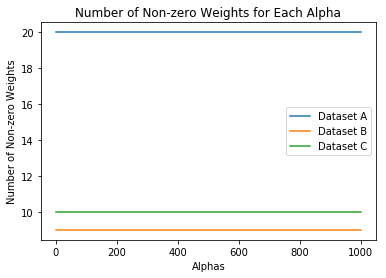

------------------- PART (B)---------------------------
Lambdas that yield the minimum number of non-zero coefficients
   Dataset  Alpha
0        A      1
1        A     50
2        A    100
3        A    200
4        A   1000
5        B      1
6        B     50
7        B    100
8        B    200
9        B   1000
10       C      1
11       C     50
12       C    100
13       C    200
14       C   1000
------------------- PART (C)---------------------------


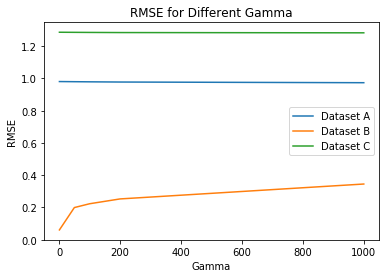

   Dataset  Alpha     Error
0        A   0.01  0.974488
1        A   0.05  0.971113
2        A   0.10  0.971253
3        A   0.20  0.971253
4        A   0.30  0.971253
5        B   0.01  0.135084
6        B   0.05  0.243201
7        B   0.10  0.285262
8        B   0.20  0.376322
9        B   0.30  0.430763
10       C   0.01  1.286179
11       C   0.05  1.284635
12       C   0.10  1.283403
13       C   0.20  1.282576
14       C   0.30  1.279476
------------------- PART (D)---------------------------
Alpha values that produce the minimum test error:

   Dataset  Alpha     Error  # Nonzero Weights
4        A   1000  0.973628                 20
5        B      1  0.060665                  9
14       C   1000  1.283027                 10
------------------- PART (E)---------------------------
As seen in part A, it is not possible to set all the coefficients to 0. This is because ridge regression uses the l2 norm as penalty which can set weights close to 0, but not equal to 0


In [4]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score

class Ridge:
    def __init__(self, gamma, data):
        self.gamma = gamma
        self.data = data
        
        self.w = np.array([])
        
    def fit(self):
        '''
        Here you must fit a Ridge model, train it using the data you have in self.data, 
        specifically the training part, for the specified value of gamma in self.gamma. 
        Calculate the number of non-zero coefficients in the model weights. Then,
        test the trained model on the testing part of the data in self.data and calculate the
        Root mean square error between the predicted values and the actual values of target variable.
        
        RETURN : 
            num_nonzero_coeff : number of non-zero coefficients in the model weights
            mean_squared_err : Root mean square error between the predicted values and the 
            actual values of target variable
        '''
        
        ridge = linear_model.Ridge(self.gamma)
        ridge.fit(self.data.train_x, self.data.train_y)
        num_nonzero_coef = np.where(ridge.coef_ != 0 ,1,0).sum()
        self.w = ridge.coef_
        pred = ridge.predict(self.data.test_x)
        mean_squared_err = np.sqrt(mean_squared_error(pred, self.data.test_y))
        return(num_nonzero_coef, mean_squared_err, pred)



data_sets = {'A': data_a, 'B': data_b, 'C': data_c}
alphas = [1, 50, 100, 200, 1000]




print('------------------- PART (A)---------------------------')

nonzero_list_r = []
templist_r = []

for key, dset in data_sets.items():
    for a in alphas:
        ridge = Ridge(a, dset) #instantiate a Lasso model for given alpha(a) and dataset(dset)
        model_r = ridge.fit()
        nonzero_list_r.append(model_r[0])                            #append number of non zero weights to a list
        print("Num of nonzero coeff. in dataset",key, "for gamma value of", a,":", model_r[0])
        
        templist_r.append(((key, a, model_r[0], ridge.w, model_r[1], model_r[2]))) #temporary list that will be converted to dataframe later

        
nonzero_arr_r = np.asarray(nonzero_list_r)
nonzero_arr_r = np.transpose(nonzero_arr_r.reshape(3,5))
df_r = pd.DataFrame(data = templist_r, columns=['Dataset', 'Alpha', '# Nonzero Weights', 'Weights', 'Error', 'Pred'])


plt.plot(alphas, nonzero_arr_r)
plt.title("Number of Non-zero Weights for Each Alpha")
plt.xlabel("Alphas")
plt.ylabel("Number of Non-zero Weights")
plt.legend(['Dataset A','Dataset B','Dataset C'])
plt.show()



print('------------------- PART (B)---------------------------')
#Report the value of  𝜆  that yields the minimum number of non-zero coefficients in the resulting  
#𝐰  in case of each dataset, and report the number of non-zero coefficients in that case. Keep track of this  
#𝐰 , we will refer to it as  𝐰𝑏 . [This step is only needed if any  𝐰  has coefficients that are 0.]

#Subset the dataframes for each dataset
Adf_r = df_r[df_r.iloc[:,0] == 'A']
Bdf_r = df_r[df_r.iloc[:,0] == 'B']
Cdf_r = df_r[df_r.iloc[:,0] == 'C']

Awb_mask_r = Adf_r.iloc[:,2] == Adf_r.iloc[:,2].min() #creates mask for lambda that yields the minimum # of non-zero coeff
Bwb_mask_r = Bdf_r.iloc[:,2] == Bdf_r.iloc[:,2].min()
Cwb_mask_r = Cdf_r.iloc[:,2] == Cdf_r.iloc[:,2].min()

cols = ['Dataset','Alpha','Error', '# Nonzero Weights']

Awb_r = Adf_r[Awb_mask_r][cols]
Bwb_r = Bdf_r[Bwb_mask_r][cols]
Cwb_r = Cdf_r[Cwb_mask_r][cols]

wb_ridge = Awb_r.append(Bwb_r).append(Cwb_r)

#Print the rows for each dataset where there is a minimum of non-zero coefficients
print("Lambdas that yield the minimum number of non-zero coefficients")
print(Adf_r[Awb_mask_r].iloc[:,:2].append(Bdf_r[Bwb_mask_r].iloc[:,:2]).append(Cdf_r[Cwb_mask_r].iloc[:,:2]) )

print('------------------- PART (C)---------------------------')
#For each of the classifiers learned in part (A), compute their test error as mean-squared-error. Plot the test error as function of  𝜆  for all three datasets in the same grap

plt.plot('Alpha', 'Error', data=Adf_r)
plt.plot('Alpha', 'Error', data=Bdf_r)
plt.plot('Alpha', 'Error', data=Cdf_r)
plt.title("RMSE for Different Gamma")
plt.xlabel("Gamma")
plt.ylabel("RMSE")
plt.legend(['Dataset A','Dataset B','Dataset C'])
plt.show()

print(df[['Dataset', 'Alpha', 'Error']])


print('------------------- PART (D)---------------------------')
#Report the value of  𝜆  that yields the  𝐰  with the minimum test error in case of each dataset. Save this  𝐰  as  𝐰𝑑 .
#How many non-zero coordinates does  𝐰𝑑  have? Keep track of this, as well as the answers for  𝐰𝑏 
#for the comparison to Ridge Regression below. It might be helpful to make a table, i.e. the number of non-zero coordinates and the test error for  𝐰𝑏  and  𝐰𝑑  for each data set.
alphas_rep = np.repeat(alphas,3).reshape(5,3)

Aerr_mask_r = Adf_r['Error'] == np.amin(Adf_r['Error'],axis=0) #find the rows that contain the minimum error
Berr_mask_r = Bdf_r['Error'] == np.amin(Bdf_r['Error'],axis=0)
Cerr_mask_r = Cdf_r['Error'] == np.amin(Cdf_r['Error'],axis=0)

Amin_err_r = Adf_r[Aerr_mask_r]  #get rows values for A that produced the minimum erro
Bmin_err_r = Bdf_r[Berr_mask_r] 
Cmin_err_r = Cdf_r[Cerr_mask_r]

wd_ridge = Amin_err_r[cols].append(Bmin_err_r[cols]).append(Cmin_err_r[cols]) 

print('Alpha values that produce the minimum test error:\n')
print(wd_ridge)


print('------------------- PART (E)---------------------------')
print('As seen in part A, it is not possible to set all the coefficients to 0. This is because ridge regression uses the l2 norm as penalty which can set weights close to 0, but not equal to 0')


3. [10 pts] Compare the two algorithms on each data set: compare the number of non-zero coordinates of the $\mathbf w_d$'s, and compare the test error rates of the $\mathbf w_b$'s. Report your results and comment on them.

In [5]:
print("Comparing wd's")
print("Lasso:", wd_lasso, "\n\nRidge:", wd_ridge)

print("\n\nComparing wb's")
print("Lasso:", wb_lasso, "\n\nRidge:", wb_ridge)

Comparing wd's
Lasso:    Dataset  Alpha     Error  # Nonzero Weights
1        A   0.05  0.971113                  1
5        B   0.01  0.135084                  9
14       C   0.30  1.279476                  3 

Ridge:    Dataset  Alpha     Error  # Nonzero Weights
4        A   1000  0.973628                 20
5        B      1  0.060665                  9
14       C   1000  1.283027                 10


Comparing wb's
Lasso:    Dataset  Alpha     Error  # Nonzero Weights
2        A    0.1  0.971253                  0
3        A    0.2  0.971253                  0
4        A    0.3  0.971253                  0
9        B    0.3  0.430763                  6
14       C    0.3  1.279476                  3 

Ridge:    Dataset  Alpha     Error  # Nonzero Weights
0        A      1  0.980786                 20
1        A     50  0.979890                 20
2        A    100  0.979102                 20
3        A    200  0.977825                 20
4        A   1000  0.973628                

Dataset A and wd:
Lasso had multiple values for alpha in which the number of nonzero weights was 0. However, the ridge regression did not have any weights that were 0 (all 20 weights were nonzero).

Dataset A and wb:
Overall error was higher for ridge regression than for lasso regression for dataset A.


Dataset B and wd:
The minimum number of non-zero weights for dataset B in lasso is 9, which is incidently the same as Ridge regression. Thus, no weights were made 0 for lasso regression.

Dataset B and wb:
Overall, the error rates for ridge regression were lower than Lasso.


Dataset C and wd:
Lasso has weights that were set equal to 0, as there are only 4 nonzero weights while Ridge has 10 nonzero weights.

Dataset C and wb:
Overall the rates were very similar between Lasso and Ridge for dataset C. Ridge regression appears to be marginally lower than Lasso across the different gamma(alpha/lambda) values.

## Part 2: Visualizing Data and Decision Boundaries for different kernels - 20 points

We've also been exploring the world of support vector machines and Kernels, so to understand these systems a little better, let's start by building a few ourselves.

### A. Training SVM with Linear Kernel (Dataset 1)

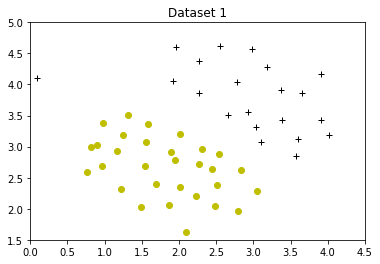

In [6]:
import numpy as np
import scipy.io as sio
import matplotlib.pyplot as plt

from plot_data import plot_data


# Load from data1
mat_data = sio.loadmat('./data/data1.mat')
X = mat_data['X']
y = mat_data['y'].ravel()

# Plot training data
plt.figure()
plot_data(X, y)
plt.xlim([0, 4.5])
plt.ylim([1.5, 5])
plt.title("Dataset 1")
plt.show()

**A:** [10 pts] In `data1.mat`, most of the positive and negative examples can be separated by a single line. We'll train an SVM with a linear kernel (look at `sklearn.svm.LinearSVC`) with C = 1 and plot the decision boundary using `visualize_boundary_linear(X, y, clf)`. `clf` is the SVM classifier. For the classifier, you should use the scikit-learn implementation. Add the decision boundary, uncomment the visualization, and verify it in the graph below.

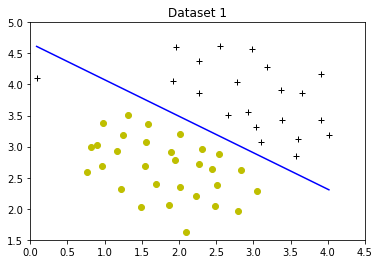

In [7]:
# SOLUTION 
from sklearn import svm
from visualize_boundary_linear import visualize_boundary_linear

### START CODE HERE ### (approx. 3 lines)
C = 1
clf = svm.LinearSVC(C=C)
clf.fit(X,y)
### END CODE HERE ### 


plt.figure()
visualize_boundary_linear(X, y, clf)
plt.xlim([0, 4.5])
plt.ylim([1.5, 5])
plt.title("Dataset 1")
plt.show()

### B. Training SVM with RBF Kernel (Dataset 2)

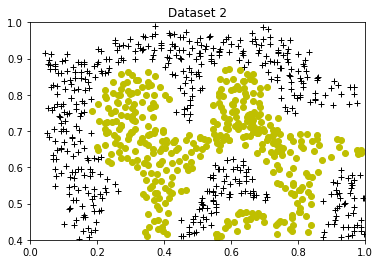

In [8]:
# Load from data2
mat_data = sio.loadmat('./data/data2.mat')
X = mat_data['X']
y = mat_data['y'].ravel()

# Plot training data
plt.figure()
plot_data(X, y)
plt.xlim([0, 1])
plt.ylim([0.4, 1])
plt.title("Dataset 2")
plt.show()

**B** [10 pts] In `data2.mat`, the positive and negative data points are not linearly separable. For this dataset, construct an SVM classifier with a Gaussian kernel (look at `sklearn.svm.SVC`) to learn a non-linear decision boundary. You should use the scikit-learn implementation for the same. To plot the decision boundary use `visualize_boundary(X, y, clf)`. As before, implement the decision boundary, uncomment the visualization, and verify it in the graph below.

C:\Users\JT\Anaconda3\lib\site-packages\matplotlib\contour.py:1243: UserWarning: No contour levels were found within the data range.
  warnings.warn("No contour levels were found"


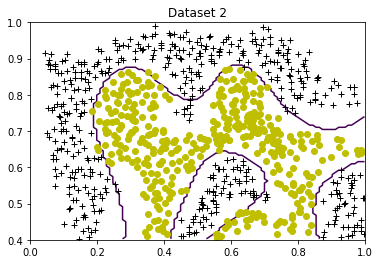

In [9]:
from visualize_boundary import visualize_boundary

# SVM Parameters to be used
C = 100
gamma = 10
kernel = 'rbf'

### START CODE HERE ### (approx. 3 lines)
clf = svm.SVC(C=C, gamma=gamma, kernel=kernel)
clf.fit(X,y)
### END CODE HERE ### 

plt.figure()
visualize_boundary(X, y, clf)
plt.xlim([0, 1])
plt.ylim([0.4, 1])
plt.title("Dataset 2")
plt.show()

## Part 3: Kernel Perceptron - 40 points

Now that we've seen the SKLearn implementation of some different kernels, we'll be working to implement some of our own kernel transformations, but we'll work within the perceptron space. Implement the Kernel Perceptron as described in the lecture using different kernel functions (Linear, Polynomial, and Gaussian RBF). Use the training and test data provided below to train and test your implementation. Report the error rate for each kernel function.

**A:** [20 pts] Implement the kernel functions below:

In [10]:
import numpy as np
from numpy import linalg

def linear_kernel(x1, x2):
    lin_kern = np.dot(np.transpose(x1),x2)
    return(lin_kern)

def polynomial_kernel(x, y, p = 3):
    poly_kern = np.power(linear_kernel(x,y)+1,p) 
    return(poly_kern)
    
def gaussian_kernel(x, y, sigma = 0.5):
    gauss_kern = np.exp(-1*np.power(linalg.norm(x-y),2)/(2*np.power(sigma,2)))
    return(gauss_kern)



In [11]:
import unittest

class TestKernels(unittest.TestCase):
    
    def setUp(self):
        self.x1 = np.array([1, 2, 1])
        self.x2 = np.array([0, 4, -1])
        
    def test0(self):
        """
        WARNING : DO NOT CHANGE THE UNIT TESTS
        Test the linear kernel
        """
        self.assertEqual(linear_kernel(self.x1, self.x2), 7)
    
    def test_polynomial_kernel(self):
        """
        WARNING : DO NOT CHANGE THE UNIT TESTS
        Test the polynomial kernel
        """
        self.assertEqual(polynomial_kernel(self.x1, self.x2), 512)
        
    def test_gaussian_kernel(self):
        """
        WARNING : DO NOT CHANGE THE UNIT TESTS
        Test the gaussian kernel
        """
        self.assertAlmostEqual(gaussian_kernel(self.x1, self.x2) * 10 ** 8, 1.52299, 4)
    

tests = TestKernels()
tests_to_run = unittest.TestLoader().loadTestsFromModule(tests)
unittest.TextTestRunner().run(tests_to_run)
            

...
----------------------------------------------------------------------
Ran 3 tests in 0.004s

OK


<unittest.runner.TextTestResult run=3 errors=0 failures=0>

**B:** [20 pts] Implement the following methods of the `KernelPerceptron` class. The `__init__` takes also as input the kernel to use. You are allowed to introduce new class variables/methods.

* Implement the `fit` method. Taking as input the training data, it learns the model parameters
* Implement the `predict` method which takes as input new examples and returns the estimated label 

In [12]:
class KernelPerceptron:
    def __init__(self, kernel = linear_kernel, Niter = 1):
        
        self.kernel = kernel
        self.Niter = Niter
        self.support_vector_x = None
        self.support_vector_y = None
        self.alpha = None
        
    def fit(self, X, y):
        '''
        Estimate model parameters i.e the support vectors here and store them in the
        class variable self.support_vector_x and self.support_vector_y
        '''
        kern_matrix = np.zeros((X.shape[0],X.shape[0]))
        self.alpha = np.zeros(X.shape[0])
        
        #using Kernel Matrix idea as shown in http://aritter.github.io/courses/5523_slides/kernels.pdf 
        ##### Alternate implementation #####
        #for a in range(X.shape[0]):
         #   for b in range(X.shape[0]):
          #      kern_matrix[a,b] = self.kernel(X[a],X[b])
        
        for n in range(self.Niter):
            for i in range(X.shape[0]):
                sum_total = 0
                for j in range(X.shape[0]):
                    kern = self.kernel(X[i],X[j])
                    sum_total = sum_total + kern*self.alpha[j]*y[j]
        
        #    y_hat = np.sign(np.sum(kern_matrix[:,j]*self.alpha*y))
        
                y_hat = np.sign(sum_total)
                if y_hat != y[i]:
                    self.alpha[i] = self.alpha[i] + 1

        mask = self.alpha > 0
        self.alpha = self.alpha[mask]
        self.support_vector_x = X[mask]
        self.support_vector_y = y[mask]
        
    def predict(self, X):
        '''
        Here X is a set of points. 
        RETURN : 
            y_predict : predicted labels for a set of points X
        '''
        y_predict = []
        weighted_sum = 0
        
        for i in range(X.shape[0]):
            for j in range(self.alpha.shape[0]):
                kern_j = self.kernel(X[i], self.support_vector_x[j])
                weighted_sum = weighted_sum + self.alpha[j]*self.support_vector_y[j]*kern_j 
            
                if j == (self.alpha.shape[0]-1):
                    pred_sign = np.sign(weighted_sum)
                    y_predict.append(pred_sign)
                    weighted_sum = 0
               
                    
        np.asarray(y_predict)            
        return(y_predict)


##  Solving a new classification problem using SVM

We are using the IRIS Dataset for this classification task. We have created a binary classification problem to determine whether a given flower is a setosa or not. To create this, we pre-processed the labels to create a label vector where setosa’s label is unchanged (i.e. its label is 1), but both versicolor and virginica are now labeled as -1. The data contains two out of the four attributes, petal width and petal length.We are going to use this dataset to test our Kernel Perceptron
<br>

<img src="wide_iris.png" alt="Drawing" style="width: 600px;"/>

<br>

In [13]:
from scipy.io import loadmat
class Data:
    def __init__(self):
        ff = lambda x,y : loadmat(x)[y]
        
        self.X_train = ff("data/iris_3/train_data.mat", "train_data")
        self.y_train = ff("data/iris_3/train_labels.mat", "train_labels").flatten()
        
        self.X_test = ff("data/iris_3/test_data.mat", "test_data")
        self.y_test = ff("data/iris_3/test_labels.mat", "test_labels").flatten()
        
data = Data()
data.X_train.shape

(135, 2)

**C:** Report the test error as a percentage for each kernel function for `Niter = 20`

In [14]:
from sklearn.metrics import accuracy_score


def get_acc(kernel, iters=20):
    kernel_perceptron = KernelPerceptron(kernel=kernel, Niter=iters)
    kernel_perceptron.fit(data.X_train, data.y_train)
    predictions = kernel_perceptron.predict(data.X_test)
    accuracy = accuracy_score(data.y_test, predictions)
    return(accuracy)


print("Error for linear kernel is:", 1-get_acc(kernel=linear_kernel))
print("\nError for polynomial kernel is:", 1-get_acc(kernel=polynomial_kernel))
print("\nError for Gaussian kernel is:", 1-get_acc(kernel=gaussian_kernel))


Error for linear kernel is: 0.4

Error for polynomial kernel is: 0.06666666666666665

Error for Gaussian kernel is: 0.06666666666666665


**Expected Output**: 

<table> 
    <tr>
    <td>
    **Linear Kernel**
    </td>
     <td>
    40 %
    </td>
    </tr>
      <tr>
    <td>
    **Polynomial Kernel**
    </td>
     <td>
    6.67 %
    </td>
    </tr>
      <tr>
    <td>
    **Gaussian Kernel**
    </td>
     <td>
    6.67 %
    </td>
    </tr>

</table> 